In [4]:
import pandas as pd
from pathlib import Path

In [5]:
PROJPATH = Path().resolve().parent
outpath = PROJPATH / "data/breakupdata/derived"


In [6]:
breakuppth = PROJPATH / "data/breakupdata/NWS-APRFC_AK_BreakupDate.csv"
breakup = pd.read_csv(breakuppth, escapechar='\\')
breakup = breakup[breakup.breakup > '1980-01-01']
breakup

,id,siteID,year,icemoved,timemoved,breakup,Impact Based Flood Severity,firstboat,unsafeman,unsafeveh,typeveh,lastice,remarks,Initial Forecast Start Date,Initial Forecast End Date,qualityFlag,internalNotes
0,7175,Koyukuk River at Bettles,2022,2022-05-05,21:00,2022-05-05,none,2022-05-23,2022-04-30,2022-04-15,pickup truck,2022-05-25,more dynamic breakup than expected; time moved...,2022-09-05,2022-09-05,NaN,NaN
1,7174,Noatak River at Noatak,2022,NaN,NaN,2022-05-20,none,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-26,2022-05-26,NaN,airport obs in contact list reports ice went 5...
2,7173,Kobuk River at Shungnak,2022,NaN,NaN,2022-05-20,unknown,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-15,2022-05-21,NaN,NaN
3,7172,Buckland River at Buckland,2022,2022-05-20,NaN,2022-05-21,moderate,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-15,2022-05-21,NaN,NaN
4,7171,Yukon River at Mountain Village,2022,NaN,NaN,2022-05-10,unknown,NaN,NaN,NaN,NaN,NaN,Resident estimated date,2022-05-15,2022-05-21,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,212,Buckland River at Buckland,1987,1987-05-21,NaN,1987-05-22,none,NaN,NaN,NaN,NaN,NaN,Jam flooded town 05-21-22.,NaN,NaN,NaN,NaN
6751,211,Buckland River at Buckland,1986,NaN,NaN,1986-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6752,210,Buckland River at Buckland,1984,NaN,NaN,1984-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6753,209,Buckland River at Buckland,1983,NaN,NaN,1983-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
tabulated = breakup.siteID.value_counts()

In [8]:
breakup_clean = breakup.groupby('siteID').filter(lambda x: len(x) >= 30)[['id', 'siteID', 'year', 'breakup']].reset_index(drop=True)
breakup_clean

,id,siteID,year,breakup
0,7175,Koyukuk River at Bettles,2022,2022-05-05
1,7173,Kobuk River at Shungnak,2022,2022-05-20
2,7172,Buckland River at Buckland,2022,2022-05-21
3,7171,Yukon River at Mountain Village,2022,2022-05-10
4,7170,Yukon River at Marshall,2022,2022-05-15
...,...,...,...,...
1489,213,Buckland River at Buckland,1988,1988-05-05
1490,212,Buckland River at Buckland,1987,1987-05-22
1491,211,Buckland River at Buckland,1986,1986-05-30
1492,210,Buckland River at Buckland,1984,1984-05-23


In [9]:
breakup_clean.siteID.value_counts()

Kuskokwim River at Bethel             43
Kuskokwim River at McGrath            43
Yukon River at Dawson                 43
Tanana River at Nenana                43
Yukon River at Eagle                  43
Yukon River at Galena                 42
Koyukuk River at Bettles              41
Kuskokwim River at Aniak              40
Kobuk River at Kobuk                  39
Yukon River at Circle                 39
Yukon River at Fort Yukon             39
Kobuk River at Ambler                 38
Yukon River at Tanana                 38
Kuskokwim River at Akiak              37
Yukon River nr Emmonak                37
Yukon River at Kaltag                 37
Kuskokwim River at Nikolai            37
Kuskokwim River at Crooked Creek      37
Kuskokwim River at Red Devil          37
Yukon River at Ruby                   37
Koyukuk River at Hughes               36
Yukon River at Russian Mission        36
Yukon River at Mountain Village       36
Yukon River at Holy Cross             36
Koyukuk River at

In [10]:
breakup_clean['JulianDay'] = pd.to_datetime(breakup_clean.breakup).dt.strftime('%j').astype('int')
breakup_clean['year'] = breakup_clean.year.astype('int')
breakup_clean

,id,siteID,year,breakup,JulianDay
0,7175,Koyukuk River at Bettles,2022,2022-05-05,125
1,7173,Kobuk River at Shungnak,2022,2022-05-20,140
2,7172,Buckland River at Buckland,2022,2022-05-21,141
3,7171,Yukon River at Mountain Village,2022,2022-05-10,130
4,7170,Yukon River at Marshall,2022,2022-05-15,135
...,...,...,...,...,...
1489,213,Buckland River at Buckland,1988,1988-05-05,126
1490,212,Buckland River at Buckland,1987,1987-05-22,142
1491,211,Buckland River at Buckland,1986,1986-05-30,150
1492,210,Buckland River at Buckland,1984,1984-05-23,144


In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
import scipy

<AxesSubplot: xlabel='year'>

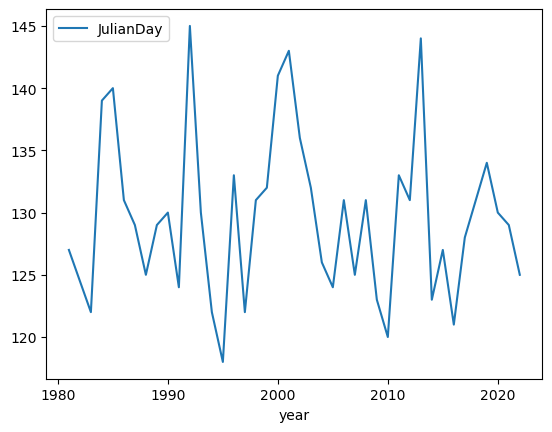

In [12]:
breakup_clean[breakup_clean.siteID=="Koyukuk River at Bettles"].sort_values('year').plot(x="year", y="JulianDay")

Load dataset again - for trend analysis, keep all years. 

In [13]:
breakup_all = pd.read_csv(breakuppth, escapechar='\\')
breakup_all_clean = breakup_all[breakup_all.breakup > '1940-01-01']
breakup_all_clean = breakup_all_clean[breakup_all_clean.siteID.isin(breakup_clean.siteID)]
# breakup_all_clean = breakup_all_clean.groupby('siteID').filter(lambda x: len(x) >= 50)[['id', 'siteID', 'year', 'breakup']].reset_index(drop=True)
breakup_all_clean['JulianDay'] = pd.to_datetime(breakup_all_clean.breakup).dt.strftime('%j').astype('int')
breakup_all_clean['year'] = breakup_all_clean.year.astype('int')

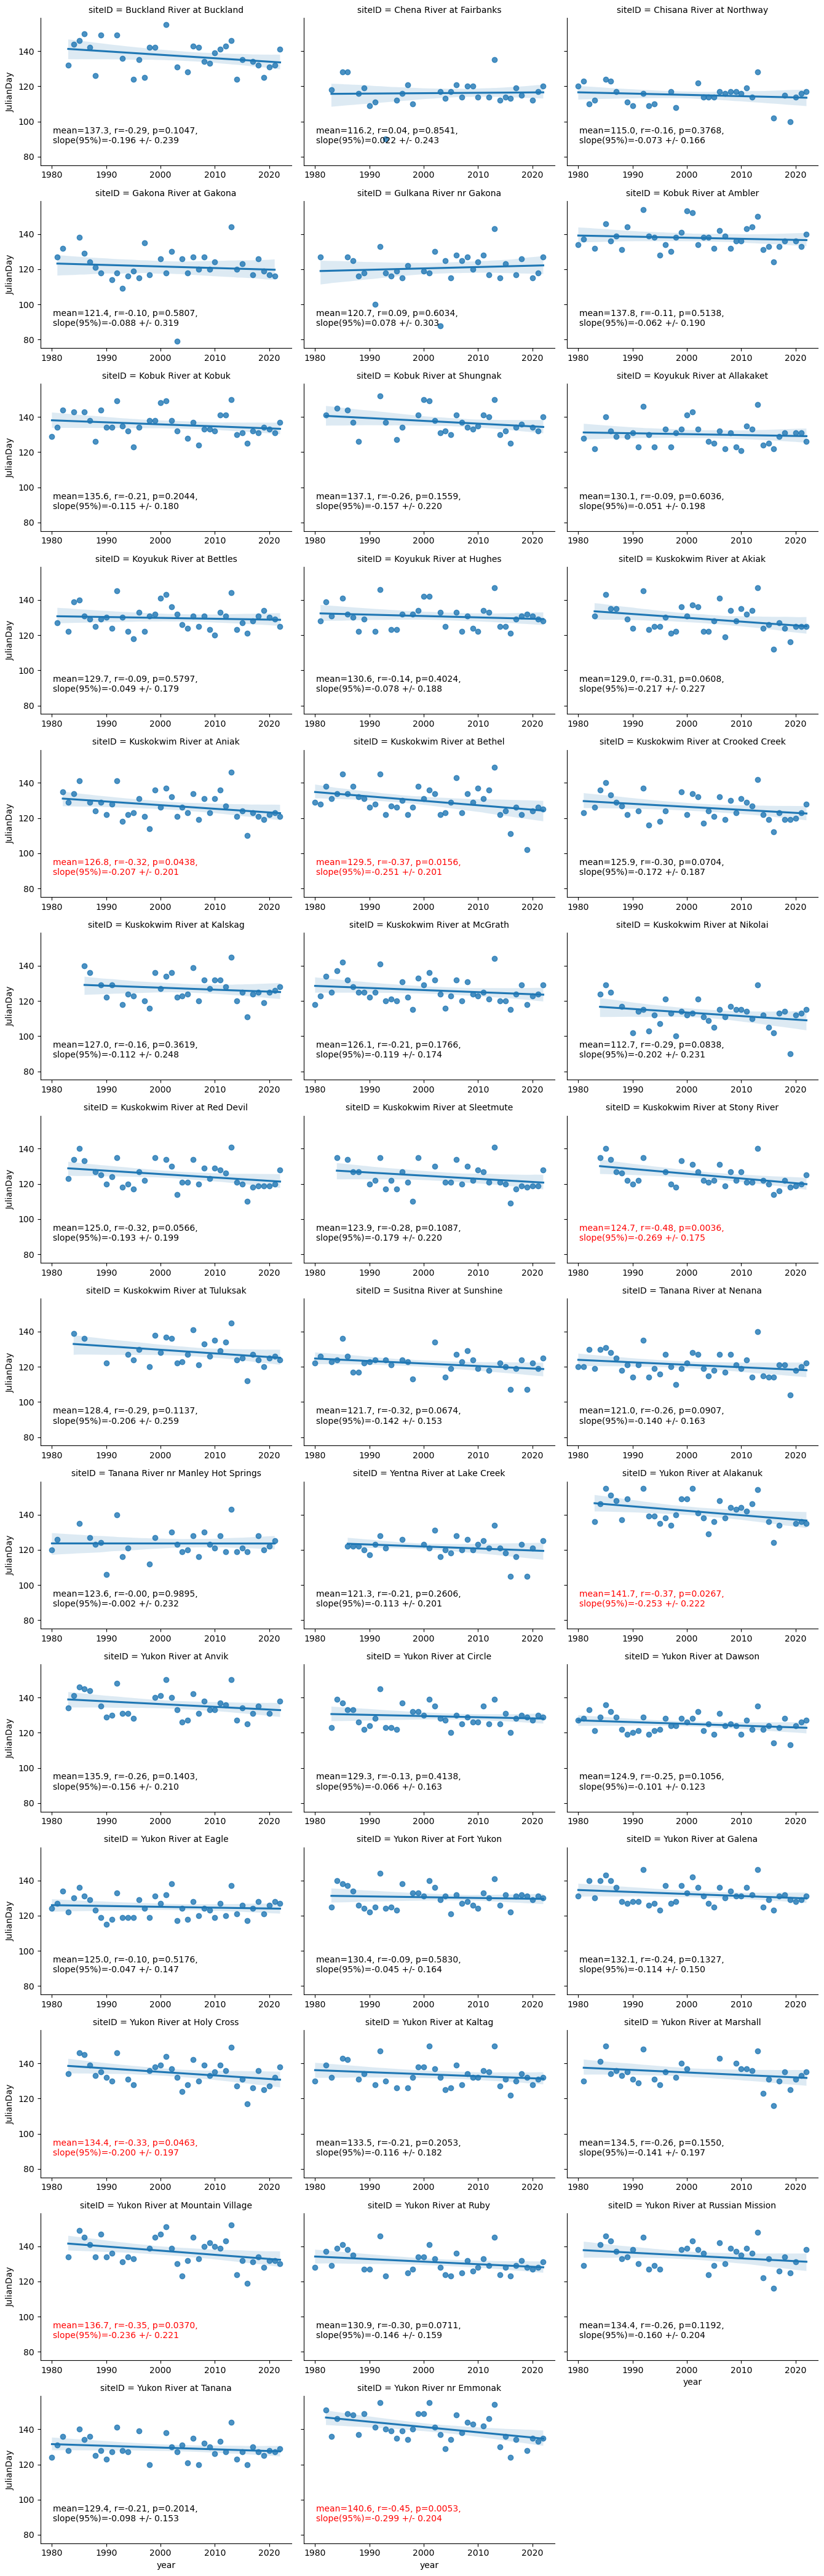

In [23]:
g = sns.lmplot(data=breakup_clean.sort_values(by=['siteID', 'year']), x="year", y="JulianDay",
               col='siteID', col_wrap=3, height=3, aspect=1.5)

def annotate(data, **kws):
    result = scipy.stats.linregress(data['year'], data['JulianDay'])
    avg = data['JulianDay'].mean()
    # t-test for 95 % confidence interval:
    tinv = lambda p, df: abs(scipy.stats.t.ppf(p/2, df))
    ts = tinv(0.05, len(data['year'])-2)
    ax = plt.gca()
    if result.pvalue < 0.05:
        if result.rvalue < 0:
            color="red"
        if result.rvalue > 0:
            color="green"
    else:
        color="black"
    ax.text(.05, .15, f'mean={avg:.1f}, r={result.rvalue:.2f}, p={result.pvalue:.4f},\nslope(95%)={result.slope:.3f} +/- {ts*result.stderr:.3f}',
            transform=ax.transAxes, color=color)

g.map_dataframe(annotate)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

Text(0.27, 0.965, '(Selected stations have at least 30 years of data since 1980)')

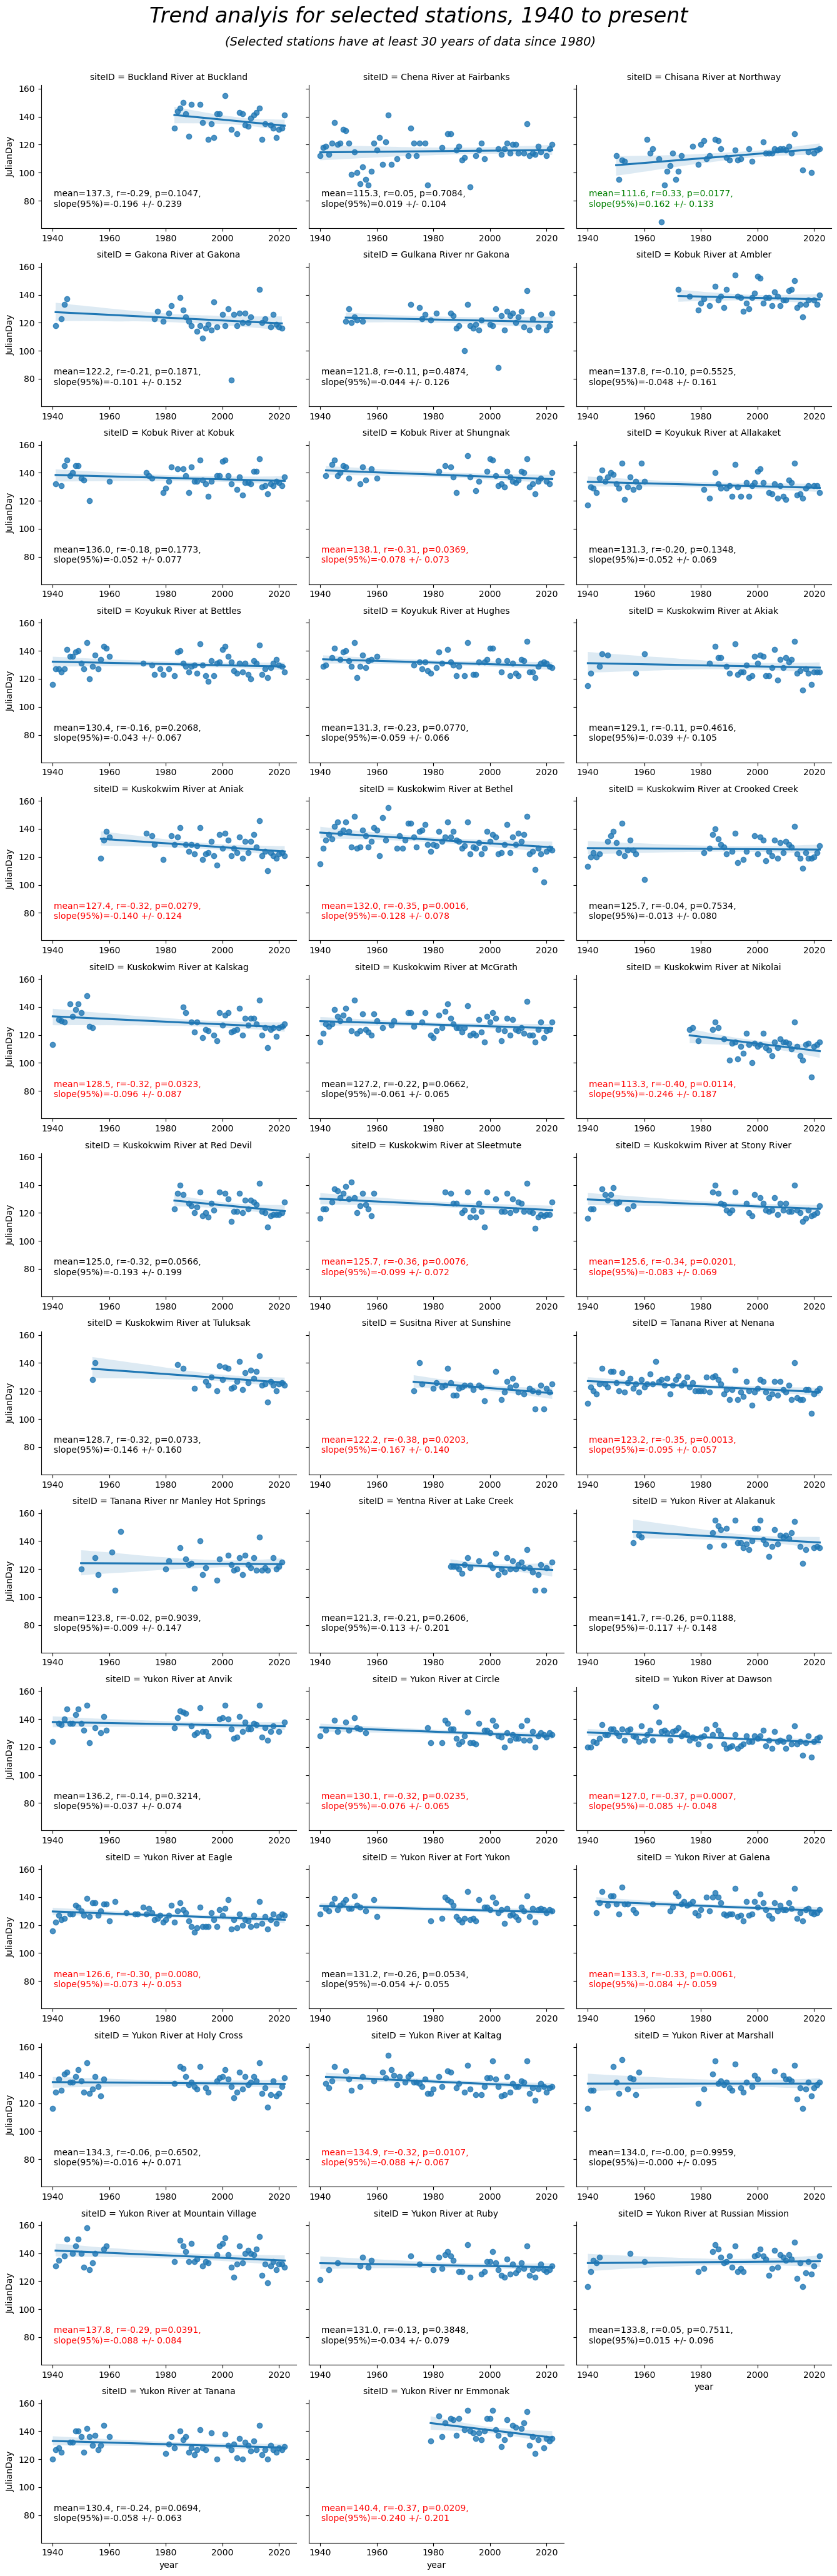

In [35]:
g = sns.lmplot(data=breakup_all_clean.sort_values(['siteID', 'year']), x="year", y="JulianDay",
               col='siteID', col_wrap=3, height=3, aspect=1.5,)

def annotate(data, **kws):
    result = scipy.stats.linregress(data['year'], data['JulianDay'])
    avg = data['JulianDay'].mean()
    # t-test for 95 % confidence interval:
    tinv = lambda p, df: abs(scipy.stats.t.ppf(p/2, df))
    ts = tinv(0.05, len(data['year'])-2)
    ax = plt.gca()
    if result.pvalue < 0.05:
        if result.rvalue < 0:
            color="red"
        if result.rvalue > 0:
            color="green"
    else:
        color="black"
    ax.text(.05, .15, f'mean={avg:.1f}, r={result.rvalue:.2f}, p={result.pvalue:.4f},\nslope(95%)={result.slope:.3f} +/- {ts*result.stderr:.3f}',
            transform=ax.transAxes, color=color)

g.map_dataframe(annotate)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

g.fig.subplots_adjust(top=0.95) 
g.fig.suptitle('Trend analyis for selected stations, 1940 to present', fontsize=24, style="italic")
g.fig.text(x=0.27, y=0.965, s='(Selected stations have at least 30 years of data since 1980)', fontsize=14, style="italic")


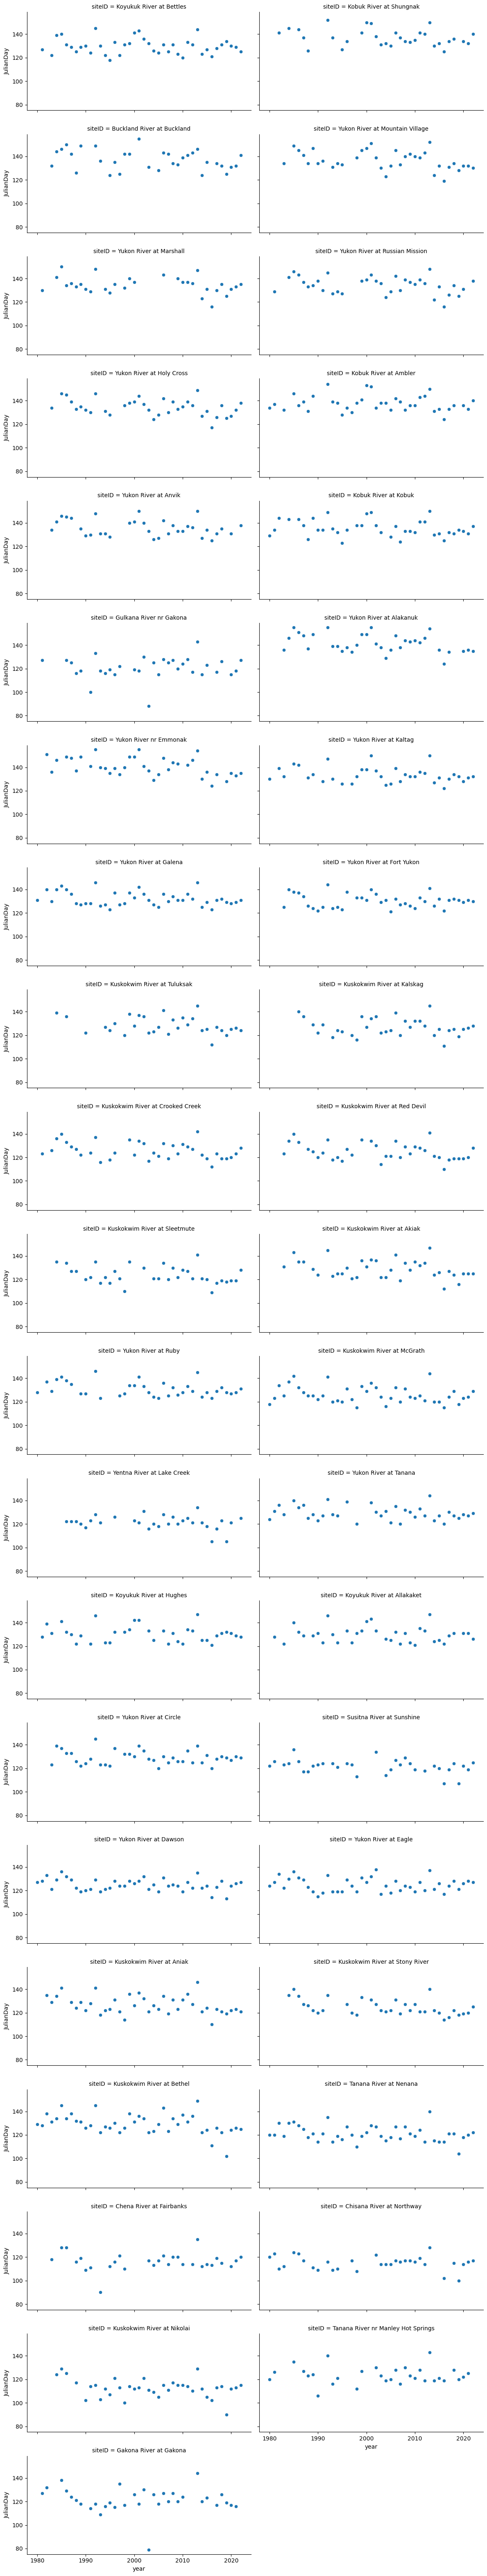

In [81]:

g = sns.FacetGrid(breakup_clean, col='siteID', col_wrap=2, height=3, aspect=2)
g.map(sns.scatterplot, "year", "JulianDay")


In [33]:
with open(outpath / "breakupDate_cleaned.csv", "w") as dst:
    dst.write("# Data from NWS-APRFC_AK_BreakupDate.csv\n")
    dst.write("# Only sites with more than 30 data points since 1980\n")
    dst.write("# \n")
    breakup_clean.to_csv(dst)    